# 빌릴 땐 마음대로지만 반납할 땐 아니란다
by Sean Park, 20-04-16  
[블로그]()  
[Github](https://github.com/Sean-Parkk)
> *성수동에는 따릉이가 정말 많다.*  
카페 거리, 서울숲 산책, 한강 자전거길 등 주변에 자전거로 즐길 콘텐츠가 많아서 일 것이다.  
반면, 성수동에서 따릉이를 타고 본가인 쌍문동까지 가면, 따릉이를 반납할 곳이 참 없다고 느꼈었다.  
**지역마다 따릉이 분포가 어떤지** 살펴보고, **어느 구역에 확충하면 좋을 지** 살펴보자.

* 목적: 서울 지역 따릉이 분포 분석하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-가져오기" data-toc-modified-id="1.-데이터-가져오기-1">1. 데이터 가져오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2-2.-데이터-형식-변경,-컬럼-추가" data-toc-modified-id="2-2.-데이터-형식-변경,-컬럼-추가-2.1">2-2. 데이터 형식 변경, 컬럼 추가</a></span></li></ul></li></ul></div>

## 1. 데이터 가져오기
* 대여소 정보: [링크](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)
    * 19.12.09 기준 데이터를 사용
* 이용 정보: [링크](https://data.seoul.go.kr/dataList/OA-15249/F/1/datasetView.do)
    * 18.12~19.11 간 데이터를 사용 (두 개의 파일 사용)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import folium
import googlemaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', size=14)
plt.rc('font', family='NanumGothic')

In [3]:
# 파일 불러오기
df_rent1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='대여')
df_rent2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='대여')
df_return1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='반납')
df_return2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='반납')
df_station = pd.read_excel('source/Seoulbike/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx')

In [4]:
df_rent1.head(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,201906,3909
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2432
2,강남구,2303. 논현역 7번출구,201906,1567


In [5]:
df_rent1.tail(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
9269,중랑구,1457. 동원사거리,201911,577
9270,중랑구,1458. 상봉터미널2,201911,1243
9271,중랑구,1459. 용마한신아파트사거리,201911,339


In [6]:
df_rent2.head(3)

,구분,대여소명,대여일자,대여건수
0,강남구,2301. 현대고등학교 건너편,201812.0,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,500.0
2,강남구,2303. 논현역 7번출구,201812.0,286.0


In [7]:
df_rent2.tail(3)

,구분,대여소명,대여일자,대여건수
9186,중랑구,1457. 동원사거리,201905.0,827.0
9187,중랑구,1458. 상봉터미널2,201905.0,1421.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,447.0


In [8]:
df_return1.head(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402


In [9]:
df_return1.tail(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
9270,중랑구,1457. 동원사거리,201911,572
9271,중랑구,1458. 상봉터미널2,201911,1305
9272,중랑구,1459. 용마한신아파트사거리,201911,316


In [10]:
df_return2.head(3)

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0


In [11]:
df_return2.tail(3)

,구분,대여소명,반납일자,반납건수
9186,중랑구,1457. 동원사거리,201905.0,749.0
9187,중랑구,1458. 상봉터미널2,201905.0,1492.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,320.0


In [12]:
df_station.head(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14


In [13]:
df_station.tail(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
1538,종로구,465.0,465. 삼청공원 앞,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019.11.20,5
1539,종로구,664.0,서울시립대 대학본부,동대문구 서울시립대로 163 서울시립대학교,37.584129,127.057938,2019.11.20,10
1540,합계,NaN,1540,NaN,NaN,NaN,NaN,19545


* station 마지막 레코드인 합계를 지워주자.

In [14]:
df_station.drop(1540, axis=0, inplace=True)

## 2. 데이터 전처리

* 서로 컬럼명이 다름, 병합을 위해 컬럼명을 맞춰줘야함
* 코딩 편의를 위해 컬럼명 영어로 통일하기!
    * 한글명은 한영키를 한 번 더 눌러줘야해서 오타 확률이 더 높은듯

In [15]:
# 데이터 형태 출력
print(df_rent1.shape,'\n',df_rent2.shape)

(9272, 4) 
 (9189, 4)


In [16]:
# 컬럼명 변경, 데이터 합치기
df_rent1.columns=['district','station','date','count']
df_rent2.columns=['district','station','date','count']
df_rent = pd.concat([df_rent1, df_rent2])
print(df_rent.shape)
df_rent.head()

(18461, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,559.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,730.0


* 이번엔 반납 데이터를 확인해보자!

In [17]:
df_return1.head()

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402
3,강남구,2304. 신영 ROYAL PALACE 앞,201906,207
4,강남구,2305. MCM 본사 직영점 앞,201906,905


In [18]:
df_return2.head()

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201812.0,62.0
4,강남구,2305. MCM 본사 직영점 앞,201812.0,218.0


In [19]:
# 컬럼명 통일, 데이터 합치기
df_return1.columns = ['district', 'station', 'date', 'count']
df_return2.columns = ['district', 'station', 'date', 'count']

df_return = pd.concat([df_return1, df_return2])

In [20]:
# 제대로 합쳐졌는지 확인하기!
print(df_return1.shape, df_return2.shape)
print('총 레코드 수: {}'.format(df_return1.shape[0] + df_return2.shape[0]))
print(df_return.shape)
df_return

(9273, 4) (9189, 4)
총 레코드 수: 18462
(18462, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1402.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,207.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,905.0
...,...,...,...,...
9184,중랑구,1455. 상봉역 2번 출구,201905.0,1300.0
9185,중랑구,1456. 상아빌딩(우림시장 교차로),201905.0,867.0
9186,중랑구,1457. 동원사거리,201905.0,749.0
9187,중랑구,1458. 상봉터미널2,201905.0,1492.0


* Null값이 있는지 확인해보자.

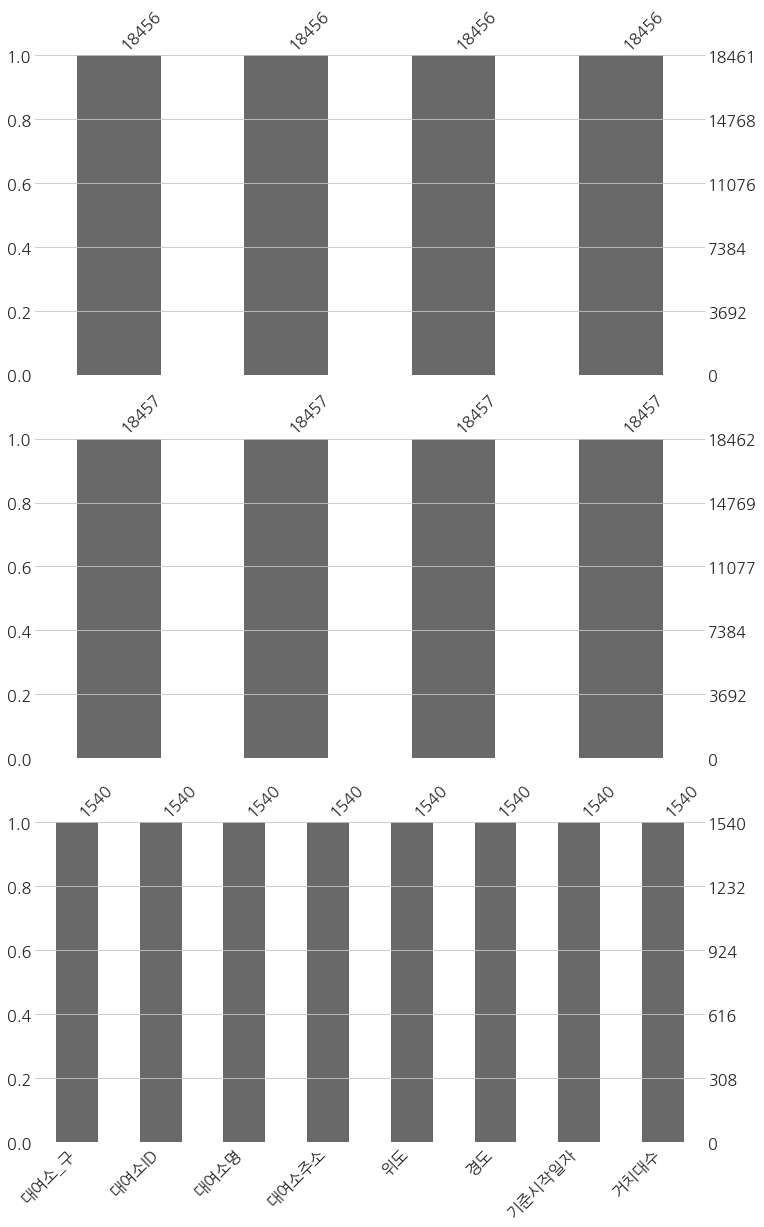

In [21]:
import missingno as msno
f, ax = plt.subplots(3, 1, figsize=(12, 20))
msno.bar(df_rent, ax=ax[0])
msno.bar(df_return, ax=ax[1])
msno.bar(df_station, ax=ax[2])

In [22]:
df_return[df_return['count'].isnull()]

,district,station,date,count
1523,NaN,NaN,NaN,NaN
3052,NaN,NaN,NaN,NaN
4579,NaN,NaN,NaN,NaN
6116,NaN,NaN,NaN,NaN
7652,NaN,NaN,NaN,NaN


In [23]:
df_rent[df_rent['count'].isnull()]

,district,station,date,count
1523,NaN,NaN,NaN,NaN
3052,NaN,NaN,NaN,NaN
4579,NaN,NaN,NaN,NaN
6116,NaN,NaN,NaN,NaN
7652,NaN,NaN,NaN,NaN


* 모든 컬럼이 null값인 레코드들이다. 삭제해주자

In [24]:
df_return.dropna(inplace=True)
df_rent.dropna(inplace=True)

In [25]:
df_rent.tail()

,district,station,date,count
9184,중랑구,1455. 상봉역 2번 출구,201905.0,1362.0
9185,중랑구,1456. 상아빌딩(우림시장 교차로),201905.0,826.0
9186,중랑구,1457. 동원사거리,201905.0,827.0
9187,중랑구,1458. 상봉터미널2,201905.0,1421.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,447.0


* 그런데, index가 중복되어있다. 인덱스를 다시 설정해주자.

In [26]:
df_return.reset_index(drop=True, inplace=True)
df_rent.reset_index(drop=True, inplace=True)

In [27]:
df_station.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [28]:
# 컬럼명 영어로 변경!
df_station.columns = ['district', 'id', 'station',
                      'address', 'lat', 'lng', 'date', 'count']

### 2-2. 데이터 형식 변경, 컬럼 추가

In [29]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456 entries, 0 to 18455
Data columns (total 4 columns):
district    18456 non-null object
station     18456 non-null object
date        18456 non-null float64
count       18456 non-null float64
dtypes: float64(2), object(2)
memory usage: 576.9+ KB


In [30]:
df_rent.head(3)

,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0


* 대여소 이름을 보면, [id. 대여소명]으로 되어있다.
* 이것을 [id], [대여소명]으로 변경하면, 나중에 station 데이터의 id컬럼과 연결 시 편리할 것으로 보인다

In [31]:
df_rent[1380:1400]

,district,station,date,count
1380,정비센터,9998. 영남주차장 정비센터,201906.0,5.0
1381,정비센터,상암센터 정비실,201906.0,2.0
1382,정비센터,중랑센터,201906.0,36.0
1383,종로구,301. 경복궁역 7번출구 앞,201906.0,1312.0
1384,종로구,302. 경복궁역 4번출구 뒤,201906.0,2446.0
1385,종로구,303. 광화문역 1번출구 앞,201906.0,1386.0
1386,종로구,304. 광화문역 2번출구 앞,201906.0,1010.0
1387,종로구,305. 종로구청 옆,201906.0,2018.0
1388,종로구,306. 광화문역 7번출구 앞,201906.0,1159.0
1389,종로구,307. 서울역사박물관 앞,201906.0,1335.0


In [32]:
import re
from tqdm import tqdm_notebook
p1 = re.compile('\d+')
p2 = re.compile('\d+[. ]')
error_row = []
for row in tqdm_notebook(df_rent.index):
    try:
        m = p1.match(df_rent.loc[row, 'station'])
        df_rent.loc[row, 'id'] = m.group()
    except:
        df_rent.loc[row, 'id'] = 'None'
        error_row.append(row)    # 에러행 저장해놓기
    try:
        df_rent.loc[row, 'station'] = p2.sub('', df_rent.loc[row, 'station'])
    except:
        error_row.append(row)    # 에러행 저장해놓기

In [33]:
error_row

[1381,
 1382,
 1543,
 1544,
 2926,
 2927,
 3088,
 4466,
 4467,
 4468,
 4631,
 6013,
 6014,
 6015,
 6178,
 6179,
 7563,
 7564,
 7725,
 9109,
 9110]

In [34]:
df_rent.loc[error_row,:].station.unique

<bound method Series.unique of 1381    상암센터 정비실
1382        중랑센터
1543     대여소명 없음
1544     대여소명 없음
2926    상암센터 정비실
2927        중랑센터
3088     대여소명 없음
4466    상암센터 정비실
4467      시스템관리팀
4468        중랑센터
4631     대여소명 없음
6013    상암센터 정비실
6014      시스템관리팀
6015        중랑센터
6178     대여소명 없음
6179     대여소명 없음
7563    상암센터 정비실
7564        중랑센터
7725     대여소명 없음
9109    상암센터 정비실
9110        중랑센터
Name: station, dtype: object>

* 정비센터이거나, 그룹명이 없는 경우가 있다. 

In [35]:
p1 = re.compile('\d+')
p2 = re.compile('\d+[. ]')
error_row_return = []
for row in tqdm_notebook(df_rent.index):
    try:
        m = p1.match(df_return.loc[row, 'station'])
        df_return.loc[row, 'id'] = m.group()
    except:
        df_return.loc[row, 'id'] = 'None'
        error_row_return.append(row)    # 에러행 저장해놓기
    try:
        df_return.loc[row, 'station'] = p2.sub('', df_return.loc[row, 'station'])
    except:
        error_row_return.append(row)    # 에러행 저장해놓기

In [36]:
len(error_row_return)

22

In [37]:
df_return.loc[error_row_return]

,district,station,date,count,id
1381,정비센터,상암센터 정비실,201906.0,9.0,None
1382,정비센터,중랑센터,201906.0,24.0,None
1543,그룹명 없음,대여소명 없음,201906.0,12644.0,None
1544,그룹명 없음,대여소명 없음,201907.0,1.0,None
1545,그룹명 없음,대여소명 없음,201907.0,12537.0,None
2927,정비센터,상암센터 정비실,201907.0,11.0,None
2928,정비센터,중랑센터,201907.0,34.0,None
3089,그룹명 없음,대여소명 없음,201908.0,12188.0,None
4467,정비센터,상암센터 정비실,201908.0,13.0,None
4468,정비센터,시스템관리팀,201908.0,2.0,None


* return데이터에도 역시 정비소거나 그룹명이 없는 경우가 존재한다.
* station데이터에서 해당 대여소에 대한 정보가 있는지 우선 찾아보자.

In [38]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [39]:
p = re.compile('\d+[. ]')
for row in df_station.index:
    try:
        df_station.loc[row, 'station'] = p2.sub('', df_station.loc[row, 'station'])
    except:
        print(row)

In [40]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5
